## We open the file and read the words from it:

In [1]:
with open ("quo_vadis.txt", 'r', encoding='utf-8') as f:
    text = f.read().split()

## Data about the book:

In [2]:
title = "Quo vadis"
author = "Henryk Sienkewicz"

## We get rid of punctuations:

In [4]:
def remove_punc(string):
    punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~—...'''
    for element in string:  
        if element in punc:  
            string = string.replace(element, "") 
    return string

In [6]:
new_text = [remove_punc(i) for i in text] #text without punctuations

## Number of words in text:

In [8]:
number_of_words = len(new_text)

## We make all leters lowercase: 

In [9]:
clean_text = list(map(lambda x: x.lower(), new_text))

## We limit word's length, so that the given word nust have min 5 letters:

In [10]:
clean_text_min5 = []
for word in clean_text:
    if len(word) >= 5:
        clean_text_min5.append(word)      

In [11]:
from collections import Counter

In [12]:
clean_text1 = Counter(clean_text_min5)

In [13]:
clean_text2 = list(clean_text1.most_common(20))

In [14]:
print(clean_text2)

[('winicjusz', 611), ('rzekł', 538), ('tylko', 496), ('który', 489), ('jeszcze', 473), ('przez', 444), ('petroniusz', 421), ('jednak', 357), ('sobie', 354), ('począł', 307), ('chwili', 301), ('nawet', 292), ('jakby', 289), ('teraz', 285), ('panie', 275), ('przed', 273), ('jeśli', 261), ('których', 261), ('niego', 260), ('cezara', 260)]


## We separate arguments and its values:

In [17]:
word, freq = zip(*clean_text2)

## We change tuples to lists: 

In [19]:
word_ll = list(word)
freq_l = sorted(list(freq))
word_l = word_ll[::-1]

## Our color palette: 

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

number_of_colors = 0

palette = sns.color_palette("cividis_r", len(word_l)).as_hex()


## We check if any words are in the text the same amount of times and adjust the colors:


In [22]:
def color_replacer(any_list, list_of_colours):
    if len(any_list) == len(list_of_colours):
        for a in range(0, len(any_list)-1):
            if any_list[a] == any_list[a + 1]:
                list_of_colours[a+1] = list_of_colours[a]
        return list_of_colours
    else:
        return print("Compatibility error")
final_palette = color_replacer(freq_l, palette)

## We create horizontal barplot: 

<Figure size 800x500 with 0 Axes>

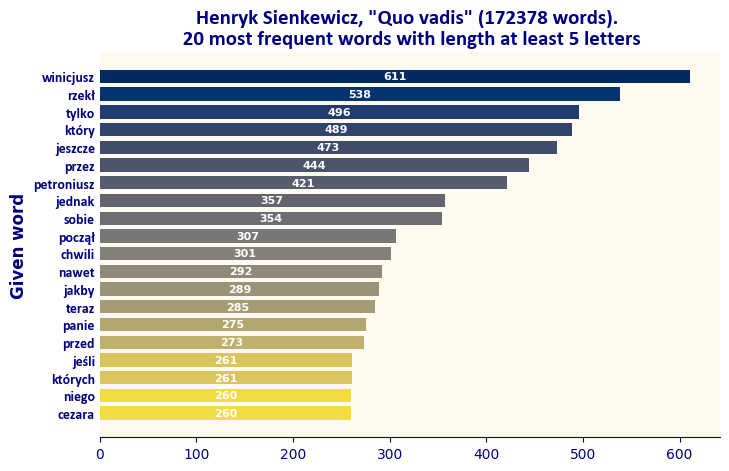

In [29]:
plt.rcParams["figure.figsize"] = (8,5)
fig = plt.figure()



fig, ax = plt.subplots()

bars = ax.barh(word_l, freq_l, color = final_palette,height=0.75)




hfont = {'fontname':'Calibri'}





plt.title(label = f'{author}, "{title}" ({number_of_words} words). \n 20 most frequent words with length at least 5 letters',
          fontsize = 15,
          fontweight = 'bold',
         color = 'navy',
         **hfont)

plt.ylabel('Given word',color = 'navy', fontsize = 12, fontweight = 'bold')



for bars in ax.containers:
   ax.bar_label(bars, color = 'white', label_type='center', fontweight='bold', fontsize = 8)


ax.set_facecolor('floralwhite')
ax.grid(False)



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

ax.spines['bottom'].set_color('navy')


             
ax.tick_params(axis='x', colors='navy')      
plt.yticks(fontname = "Calibri", color = 'navy', fontsize = 10, fontweight = 'bold')




ax.tick_params(axis='y', which='both',length=0, color = 'navy') 
    
#plt.savefig("20_the_most_ferquent_words_in_quo_vadis.pdf")

plt.show()